<img src="https://www.promocionachile.cl/img/logos/uai.JPG" width="400" alt="utfsm-logo" align="left"/>

# LEC de Probabilidad y Estadística, Viña del mar.
## Clase 03
### Profesor: Fabián Ramírez

## Objetivos:
* Cuantiles.
* Tablas de contingencia
* Detección de datos atípicos y boxplots.
* Curtosis

### Función `summary()`
En primer lugar estudiaremos la base de datos que usaremos en esta sesión, esta corresponde a `Personal Key Indicators of Heart Disease` 

            https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
            
Esta se encuentra en el Github del curso, y se lee como sigue

In [1]:
pagina = 'https://raw.githubusercontent.com/GustavoAnkelen/LEC-EyP/main/Clase%203/heart_2020_cleaned.csv'
x <- url(pagina, "r")
x <- readLines(x)
data = read.csv(text = x)

O bien, podemos leerlo directamente si lo hemos descargado como:

In [2]:
data = read.csv('heart_2020_cleaned.csv')

In [3]:
head(data)

HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No


En general, para analizar una base de datos uno debe realizar un estudio descriptivo de los datos. Sin embargo en R existe una función sumamente útil que resume la información mas importante que se puede deducir de una base de datos. Esta función se llama `summary(data)` y lo que realiza esta función depende del tipo de base de datos que se le entregue a la función, para nuestro caso veamos que le hace a nuestra base de datos.

In [4]:
summary(data)

 HeartDisease      BMI        Smoking      AlcoholDrinking Stroke      
 No :292422   Min.   :12.02   No :187887   No :298018      No :307726  
 Yes: 27373   1st Qu.:24.03   Yes:131908   Yes: 21777      Yes: 12069  
              Median :27.34                                            
              Mean   :28.33                                            
              3rd Qu.:31.42                                            
              Max.   :94.85                                            
                                                                       
 PhysicalHealth    MentalHealth    DiffWalking      Sex        
 Min.   : 0.000   Min.   : 0.000   No :275385   Female:167805  
 1st Qu.: 0.000   1st Qu.: 0.000   Yes: 44410   Male  :151990  
 Median : 0.000   Median : 0.000                               
 Mean   : 3.372   Mean   : 3.898                               
 3rd Qu.: 2.000   3rd Qu.: 3.000                               
 Max.   :30.000   Max.   :30.000        

Si se fijan esta función no nos da la varianza ni la desviación estándar de las variables numéricas, pero nos entrega para los datos cualitativos la frecuencia de los datos, mientras que para los datos cuantitativos nos da el mínimo, máximo, media, mediana y dos variables que por ahora no sabemos que son.
* 1st Qu.
* 3st Qu.

Estos datos que entrega `summary()` correspondes a los **cuantiles** los cuales los definiremos a continuación:

## Cuantiles

**Definición:**  Los cuantiles son estadísticos que permiten obtener cual es el dato que se posiciona en el porcentaje $x$ de la muestra.

**Ejemplo:** El cuantil 0.5 de una muestra de datos es la mediana.

**Definición:** LLamaremos función de cuantia a la función `quantile(data,%x)` a la función que obtiene el dato que se divide la muestra en dos partes. Una con el %x de los datos y otra con %(100-x) de los datos ordenados de menor a mayor.

Esta función esta implementada en el R y viene dada por `quantile(data,%)`. Por ejemplo podemos calcular cual es el dato que divide a la muestra en 40% y 60% ordenados de menor a mayor:

* Utilizaremos la data de contaminación por ciudades en 2021 para calcular los cuantiles correspondientes al 75, 40 y 50 porciento de los datos, así como para encontrar la mediana de las observaciones

In [5]:
imc = data$BMI
score = data$Physical
sleep = data$SleepTime

In [6]:
quantile(imc, 0.75)

75% 
31.42

In [7]:
quantile(imc,0.4)

40% 
25.84

In [8]:
quantile(imc,0.5)

50% 
27.34

Por tanto la primera mitad de los datos se encuentra hasta la medición igual a `10.7` , note que:

In [9]:
median(imc)

[1] 27.34

Esto muestra que el cuantil 0.5 es igual a la mediana.

En general la muestra se divide en partes iguales según un porcentaje. Existen varias formas de dividir la muestra en partes iguales:
* Percentil: Divide la muestra en 100 partes iguales, por tanto el percentil 11 corresponde al 11% de los datos y se puede obtener mediante la función `quantile(data,0.11)`
* Decil: Divide la muestra en 10 partes iguales, por tanto el decil 3 corresponde al 30% de los datos y se puede obtener mediante la función `quantile(data,0.30)`
* Quintil: Divide la muestra en 5 partes iguales, por tanto el quintil 4 corresponde al 80% de los datos y se puede obtener mediante la función `quantile(data,0.80)`
* Cuartil: Divide la muestra en 4 partes iguales, por tanto el cuartil 1 corresponde al 25% de los datos y se puede obtener mediante la función `quantile(data,0.25)`

De esta forma podemos dividir la muestra. Con los cuantiles podemos responder preguntas del siguiente estilo:

 * ¿Es correcto afirmar que un 30% de la muestra cumple que su `Índice de masa corporal` es menor a 25?_

Notemos que si ordenamos los datos de menor a mayor y calculamos el percentil 30 tenemos que:

In [10]:
quantile(imc,.3)

30% 
24.69

In [11]:
quantile(imc,.3) < 25

30% 
TRUE

Hasta el 30% de los datos se ha acumulado hasta `24.69`, que en particular es menor a 25. Por tanto la afirmación es verdadera.

## Tablas de contingencia

Las tablas de contingencia no son mas que tablas de frecuencias cruzadas entre dos variables. Por ejemplo:

<img src="https://1.bp.blogspot.com/-gNNeOXWwxmA/UFsyjD_xriI/AAAAAAAACk8/gHw9_7h9pJ8/s1600/TABLA_CONTINGENCIA.png" width="400" alt="utfsm-logo" align="center"/>

En esta tabla se puede distinguir claramente que hay 65 hombres que fuman, 43 hombres que no fuman, 58 mujeres que si fuman y 67 mujeres que no fuman. De la misma forma se puede distinguir que hay 123 personas que fuman y 110 personas que no fuman, además hay 108 hombres y 125 mujeres. Finalmente hay 233 datos.

Todo esto se puede inferir de una tabla de contingencias. Para construir una se puede utilizar el R y dos variables. Todo esto mediante la función `table()`. Como ejemplo construiremos una tabla de contingencia para las variables `Reclamo` y `Calidad de servicio`. Podriamos pensar que existe alguna relación entre la cantidad de reclamos y como clasifican la calidad del servicio.

In [12]:
fuma = data$Smoking
asma = data$Asthma
diabetes = data$Diabetic
alcohol = data$AlcoholDrinking

In [13]:
tabla1 = table(fuma, asma)
tabla2 = table(fuma, diabetes)
tabla3 = table(asma, diabetes)
tabla4 = table(fuma, alcohol)

In [14]:
tabla1

     asma
fuma      No    Yes
  No  163994  23893
  Yes 112929  18979

In [15]:
tabla2

     diabetes
fuma      No No, borderline diabetes    Yes Yes (during pregnancy)
  No  161583                    3822  20903                   1579
  Yes 108070                    2959  19899                    980

In [16]:
tabla3

     diabetes
asma      No No, borderline diabetes    Yes Yes (during pregnancy)
  No  235515                    5609  33712                   2087
  Yes  34138                    1172   7090                    472

In [17]:
tabla4

     alcohol
fuma      No    Yes
  No  179525   8362
  Yes 118493  13415

## ¿Qué puedemos concluir?

--------------------------------
--------------------------------

## Detección de datos atípicos
Pongamos la siguiente situación, en un curso de 45 estudiantes se registran los resultados para una evaluación en particular

* Generamos 45 datos aleatorios entre 1.0 y 7.0 redondeados a un decimal con el comando

                    notas = round(rnorm(45,10,70)/10,1)

Entonces ustedes como expertos en estadística le harán un estudio a las notas. Para ello harán el primer paso que es realizar una gráfica adecuada.

In [18]:
notas = round(runif(45,10,70)/10,1)
notas = append(notas, c(24))

In [19]:
mean(notas)

[1] 4.328261

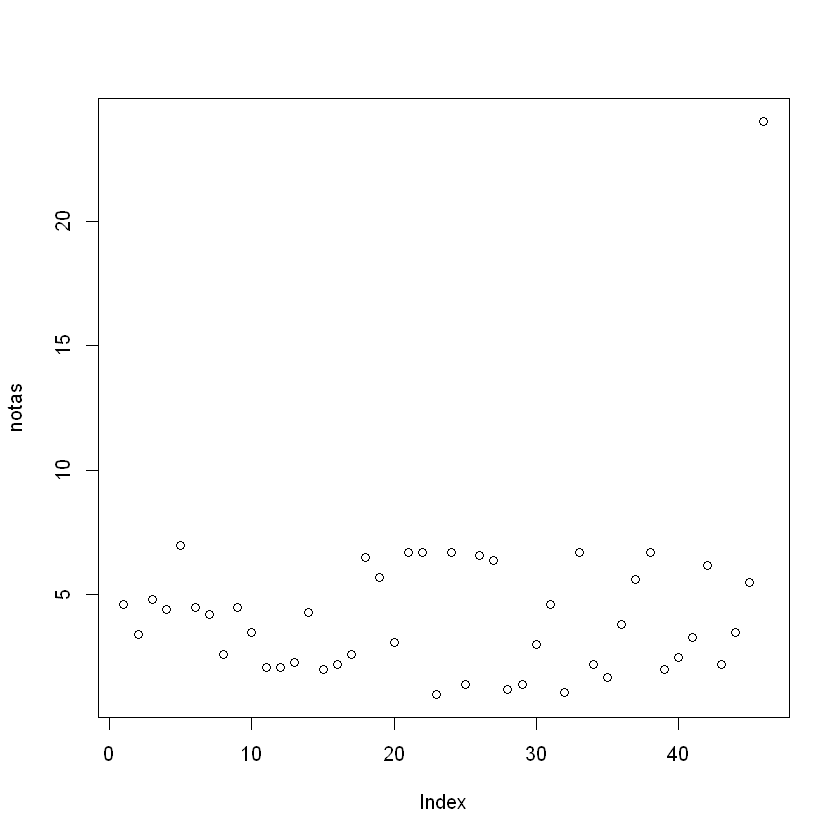

In [20]:
plot(notas)

Tu sabes que las notas de un alumno varian entre 0 y 7 pero tienes esa nota extraña. Por tanto con una simpre visualización puedes darte cuenta que tienes un dato atípico. En general existen mejores graficos para detectar estos datos atipicos, en R existe un grafico muy clasico que es el qqPlot que es el gráfico de quantile-quantile. Se puede programar de la siguiente forma

In [21]:
# install.packages('car')
library("car")

Loading required package: carData



In [22]:
# install.packages("ggplot2")
library("ggplot2")

[1] 46 23

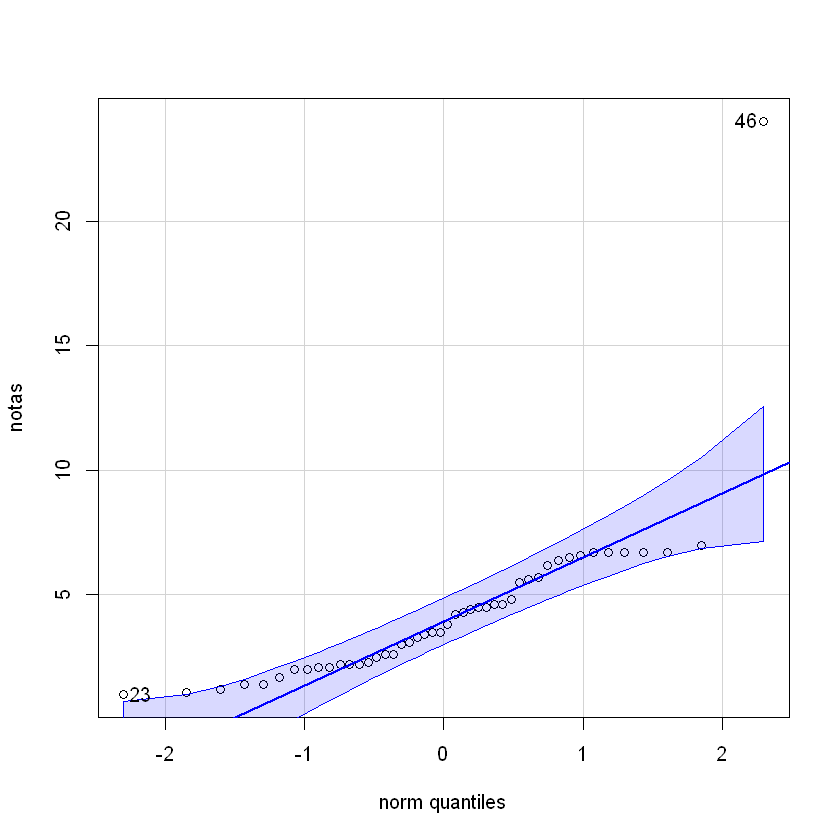

In [23]:
qqPlot(notas)

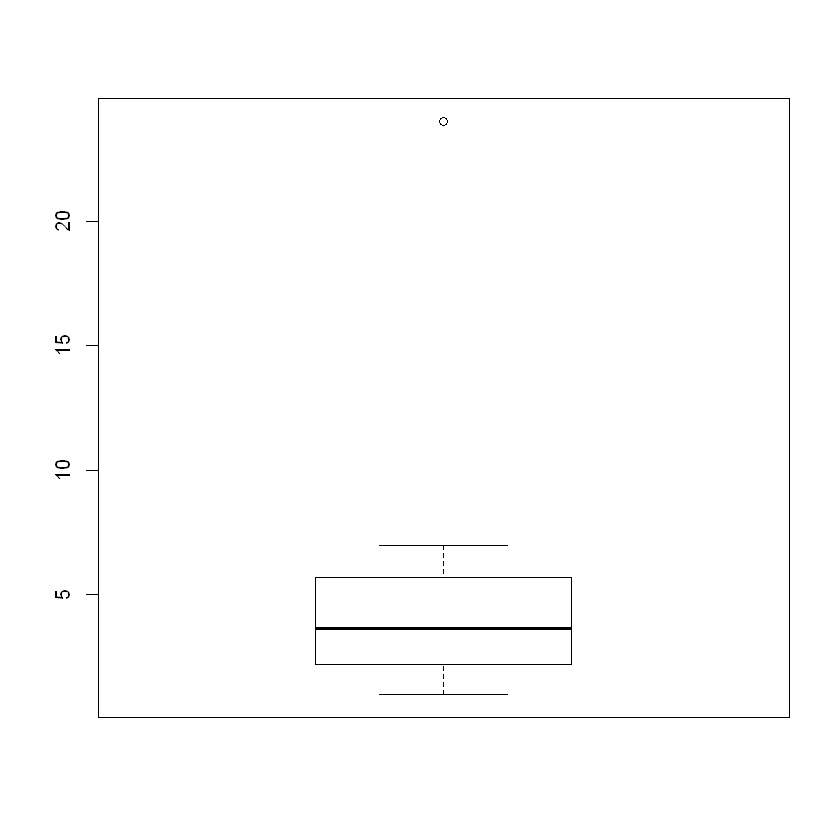

In [24]:
boxplot(notas)

Los datos fuera de las bandas de confianza los clasificaremos como datos atipicos, en este caso, encontramos que no habrían datos atípicos.

Ahora veamos estos gráficos aplicados a algunas de las variables

[1] 126897 242835

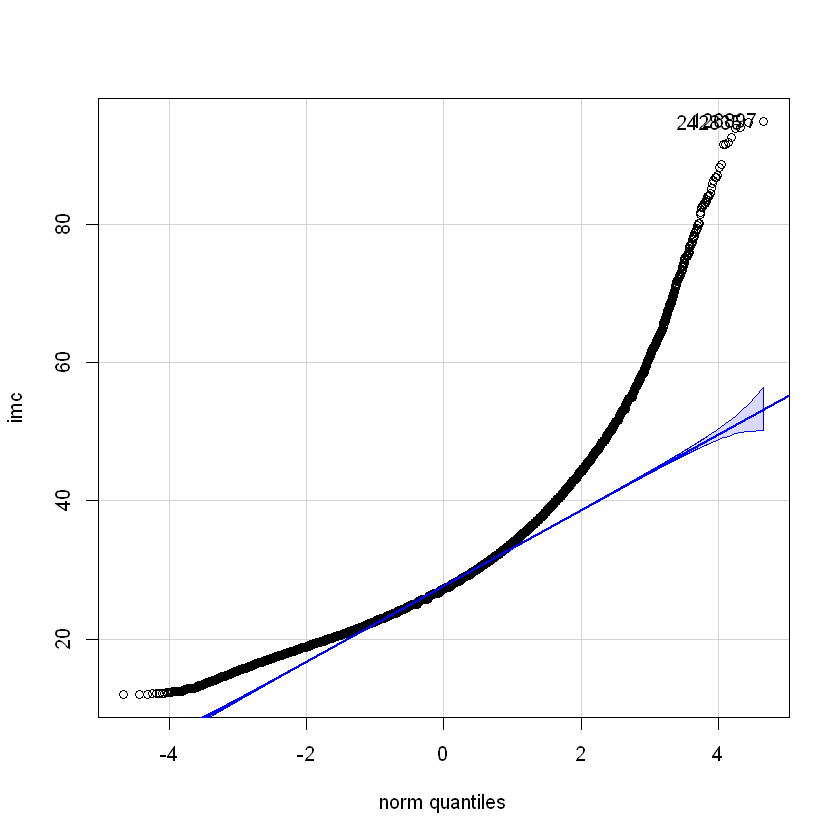

In [25]:
qqPlot(imc)

[1] 12340 15737

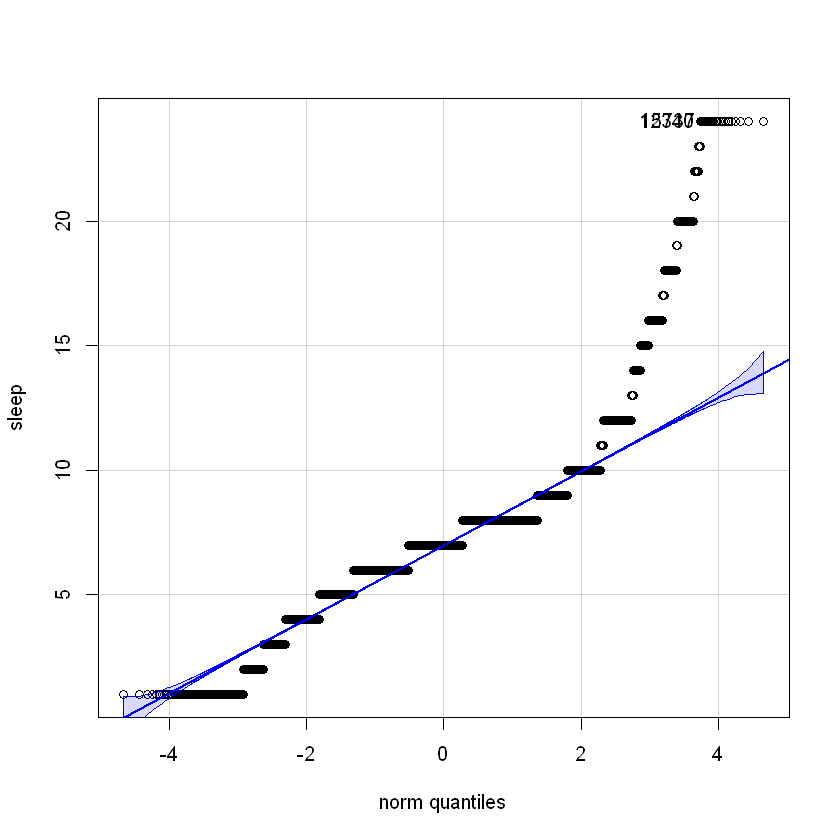

In [26]:
qqPlot(sleep)

En estos plot podemos concluir que existen varios datos atipicos en las mediciones de IMC y en las horas de sueño.

En general los qqPlot son bastante buenos pero es algo reciente, antiguamente se útilizaban otros gráficos que se llaman boxplots

### Boxplot

Un box plot es un gráfico inter cuartil que permite determinar como se acumulan los datos. Este gráfico es:

<img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png" width="400" alt="utfsm-logo" align="center"/>




* La linea amarilla representa la ubicación de la mediana, el sector en rojo el desde el percentil 25 al 75. Y los bigotes representan los extremos tolerables. 
* Finalmente los puntos fuera del boxplot son los llamados datos atipicos o outilers.

Revisemos los boxplot de nuestros ejemplos, en particular para el `índice de masa corporal`

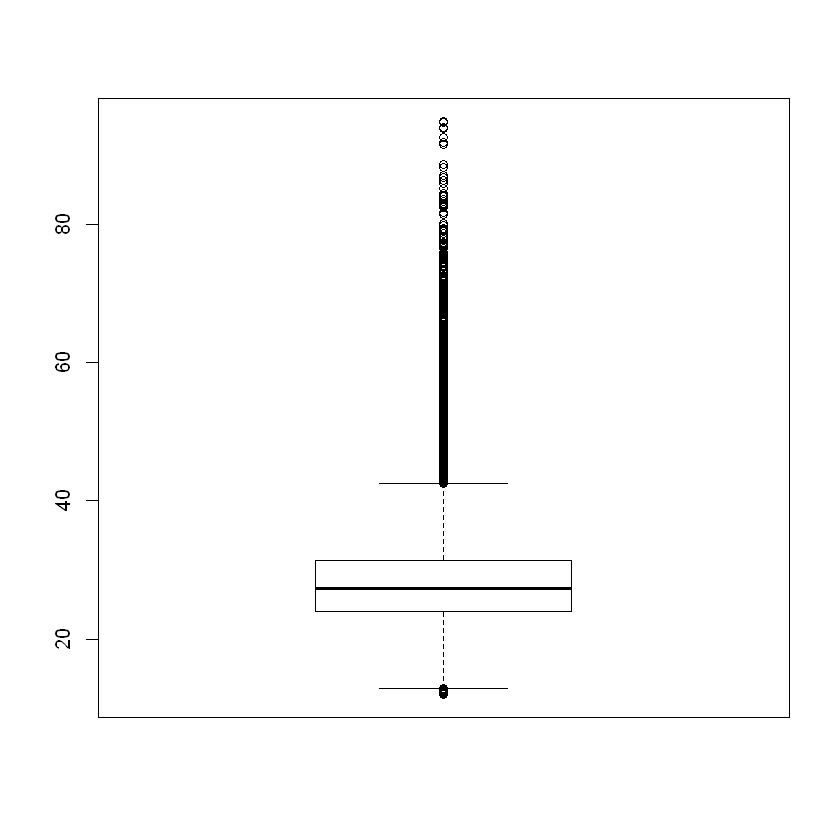

In [27]:
boxplot(imc)
IQR = quantile(imc,0.75) - quantile(imc,0.25)
max = quantile(imc,0.75) + 1.5*IQR
altoIMC = subset(data, imc > max)

In [28]:
altoIMC

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
33,No,45.35,No,No,No,30,0,Yes,Male,70-74,White,Yes,No,Good,8,No,No,No
58,No,46.52,Yes,No,No,30,0,No,Male,65-69,White,Yes,No,Poor,8,Yes,No,No
91,No,44.29,No,No,No,30,10,Yes,Female,70-74,White,No,No,Fair,7,No,No,Yes
106,No,58.54,No,No,No,30,0,Yes,Male,65-69,Other,"No, borderline diabetes",Yes,Poor,3,Yes,No,No
108,No,45.42,No,No,No,0,0,No,Female,45-49,White,No,Yes,Very good,7,Yes,No,No
137,No,45.33,No,No,No,15,15,Yes,Male,50-54,Black,Yes,No,Good,4,No,No,No
171,No,43.05,No,No,No,2,2,No,Female,70-74,White,No,Yes,Fair,6,Yes,No,No
172,No,42.83,Yes,No,No,6,0,Yes,Male,70-74,White,Yes,No,Fair,8,No,Yes,No
177,No,46.87,Yes,Yes,No,0,3,No,Female,40-44,Black,No,No,Good,8,No,No,No
229,No,43.27,No,No,No,2,9,Yes,Female,50-54,Black,Yes,No,Good,8,No,Yes,No


## Curtosis

En la clase anterior estudiamos la data set `videogames-sales.csv`, y comentamos un poco el histograma de la variable `Other_Sales`

In [29]:
data2 = read.csv('videogames-sales.csv')
head(data2)

Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NA,NA,,NA,,
Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NA,NA,,NA,,
Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NA,NA,,NA,,


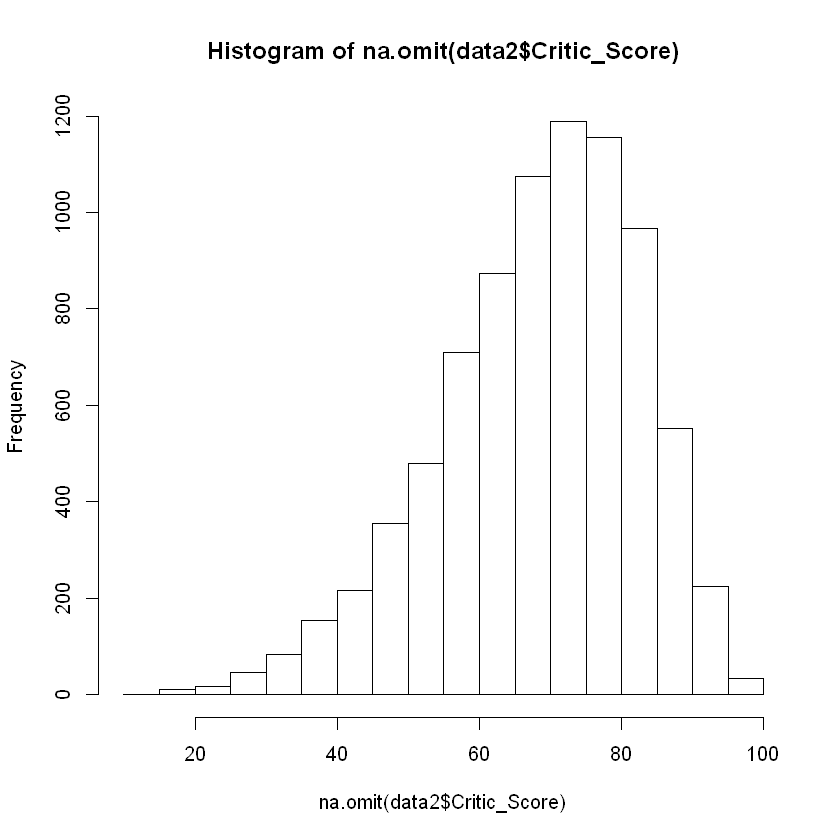

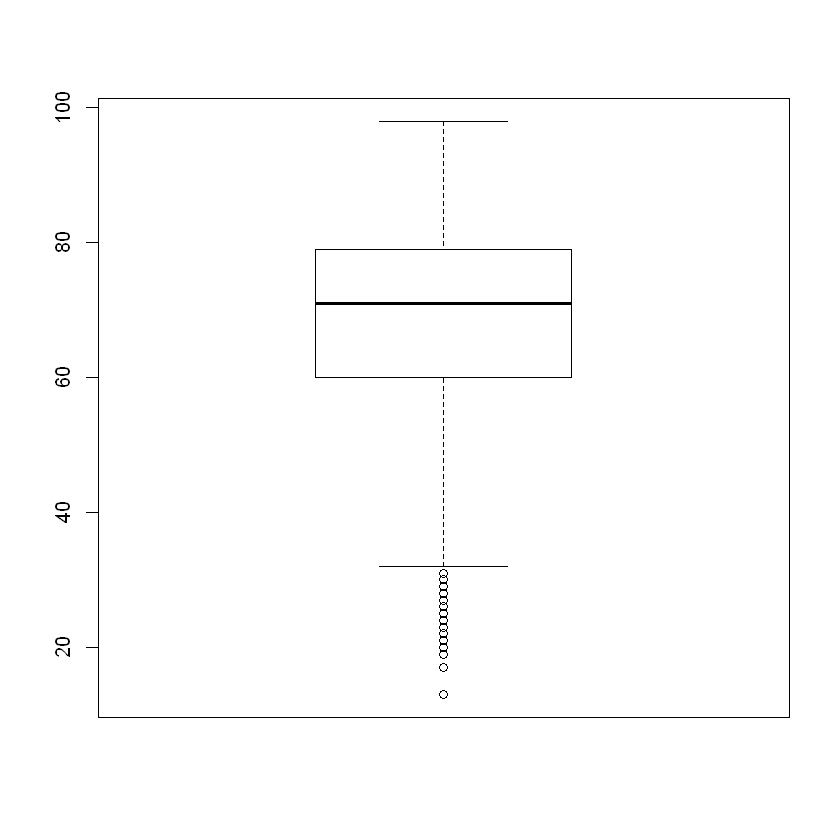

In [30]:
hist(na.omit(data2$Critic_Score))
boxplot(na.omit(data2$Critic_Score))

In [31]:
IQR = quantile(na.omit(data2$Critic_Score),0.75) - quantile(na.omit(data2$Critic_Score),0.25)
min = quantile(na.omit(data2$Critic_Score),0.25) - 1.5*IQR
malCritica = subset(data2, na.omit(data2$Critic_Score) < min & data2$Critic_Score != 'NA') # Eliminamos datos 'NA'

Warning message in na.omit(data2$Critic_Score) < min & data2$Critic_Score != "NA":
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"


In [32]:
malCritica

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
622,Mortal Kombat: Deadly Alliance,PS2,2002,Fighting,Midway Games,1.81,0.52,0.00,0.15,2.49,79,31,8.8,96,Midway,M
701,LEGO Harry Potter: Years 1-4,DS,2010,Action,Warner Bros. Interactive Entertainment,1.07,0.99,0.00,0.22,2.28,72,7,7.2,6,TT Fusion,E10+
3170,Lemony Snicket's A Series of Unfortunate Events,PS2,2004,Platform,Activision,0.31,0.24,0.00,0.08,0.64,63,25,5.7,12,Adrenium,E
3442,NCAA Football 09,PS3,2008,Sports,Electronic Arts,0.54,0.00,0.00,0.04,0.58,81,20,7.3,25,EA Tiburon,E
3590,Tony Hawk's Project 8,PSP,2006,Sports,Activision,0.41,0.07,0.00,0.07,0.56,68,11,7.6,14,Page 44 Studios,T
3704,Dynasty Warriors: Gundam 3,PS3,2010,Action,Tecmo Koei,0.11,0.04,0.36,0.02,0.54,58,18,7.5,20,"Omega Force, Koei Tecmo Games",T
4205,Metal Gear Solid: The Twin Snakes,GC,2004,Action,Konami Digital Entertainment,0.30,0.08,0.07,0.01,0.47,85,54,9,142,Silicon Knights,M
4300,Tomb Raider: Underworld,Wii,2008,Action,Eidos Interactive,0.13,0.27,0.00,0.05,0.45,70,12,7.2,20,Crystal Dynamics,T
4372,F.E.A.R. 3,X360,2011,Shooter,Warner Bros. Interactive Entertainment,0.30,0.11,0.01,0.04,0.45,75,71,7,139,Day 1 Studios,M
4388,Mario Tennis Ultra Smash,WiiU,2015,Sports,Nintendo,0.13,0.15,0.14,0.02,0.44,58,58,5.3,133,"Nintendo, Camelot Software Planning",E


Desde el histograma podemos ver que existe una expecie de normalidad de los datos, la normalidad se piensa como que los datos vienen de una distribución normal (en próximos laboratorios hablaremos en más detalle). Pero en simples palabras los datos se comportan como una campana de Gauss la cual es la que se muestra a continuación.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1b/Normal_distribution_pdf.png" width="400" alt="utfsm-logo" align="center"/>

Para saber su un conjunto de datos puede ser normal se calcula la kurtosis de los datos el cual viene dado por:

$$
\frac{1}{N} \cdot \frac{\sum_{i=1}^{N}\left(x_{i}-\bar{x}\right)^{4}}{\sigma^{4}}
$$
* Si este coeficiente es 3, la distribución se dice normal (similar a la distribución normal de Gauss) y recibe el nombre de mesocúrtica.
* Si el coeficiente es >3, la distribución se llama leptocúrtica, más puntiaguda que la anterior. Hay una mayor concentración de los datos en torno a la media.
* Si el coeficiente es <3, la distribución se llama platicúrtica y hay una menor concentración de datos en torno a la media. sería más achatada que la primera.

En el R para calcular la curtosis se puede hacer mediante la función `kurtosis()`

Y la simetria de la distribución se puede ver mediante el indice de simetria de Fisher:
$$
\frac{1}{N} \cdot \frac{\sum_{i=1}^{N}\left(x_{i}-\bar{x}\right)^{3} }{\sigma^{3}}
$$
Si la distribución es simétrica, el indice es igual a 0; si es asimétrica a la derecha, es positivo; y si es asimétrica a la izquierda, es negativo. En el R se puede calcular mediante el siguiente par de funciones:

In [33]:
#install.packages('moments')
library(moments)

In [34]:
skewness(na.omit(data2$Critic_Score))

[1] -0.6135331

Y la curtosis:

In [35]:
kurtosis(na.omit(data2$Critic_Score))

[1] 3.142026

Por tanto los datos no son tan normales como esperabamos y según el estimador deberia tener esta es asimetrica a la derecha. Veamos un conjunto de datos que si es normal:

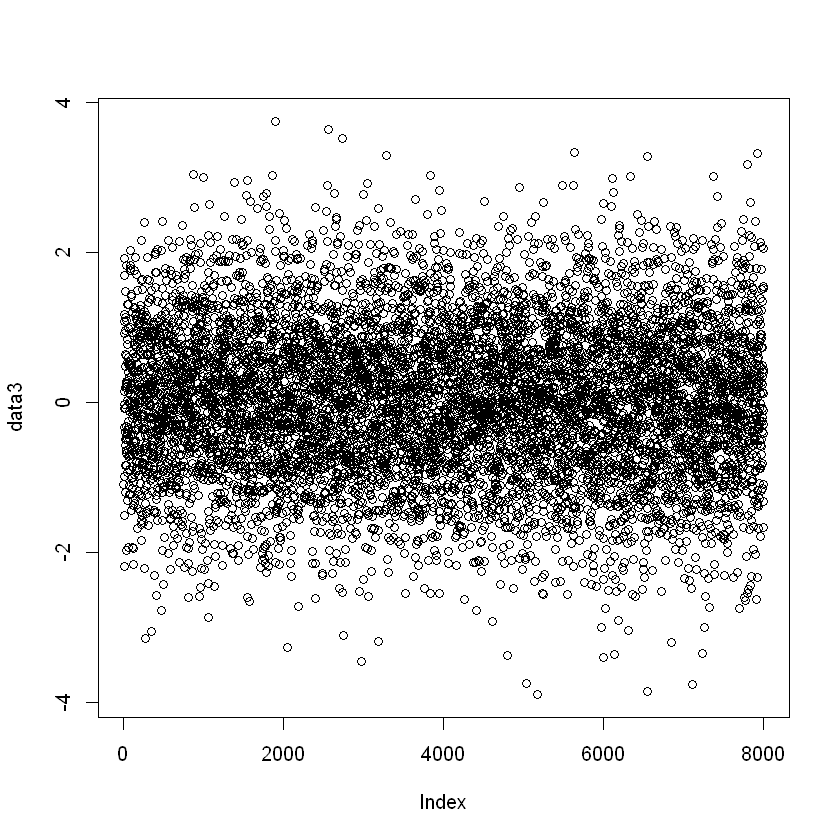

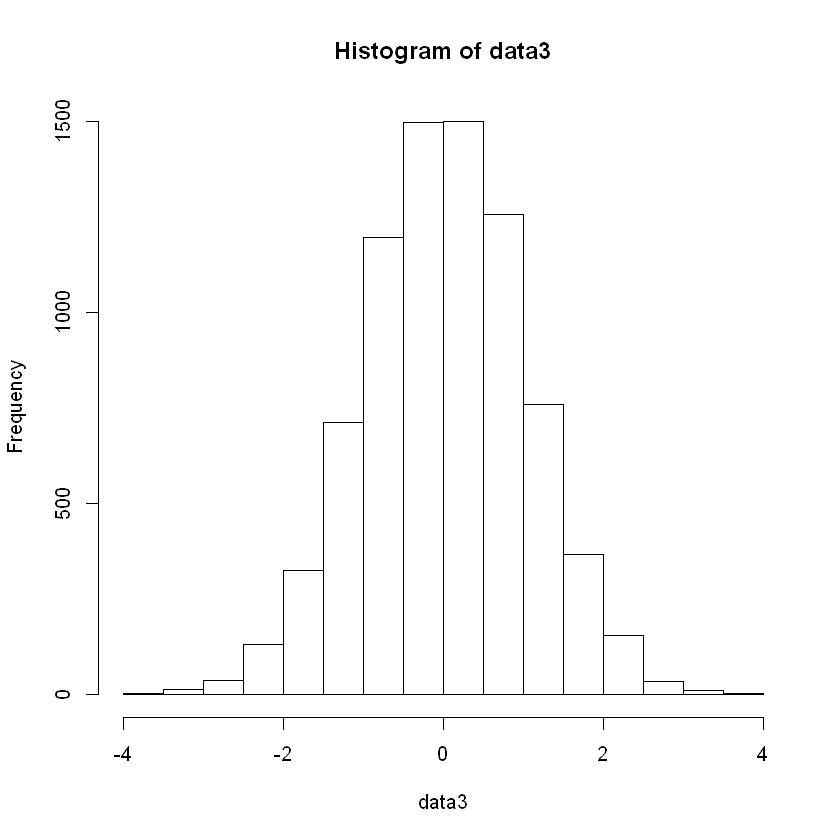

In [36]:
data3=rnorm(8000,0,1)
plot(data3)
hist(data3)

In [37]:
kurtosis(data3)

[1] 3.045808

In [38]:
skewness(data3)

[1] -0.02843372